In [1]:
from BoundaryProblem import BoundaryProblem
from PlotSolutions import PlotSolutions
from HeatProblem import HeatProblem
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plotter = PlotSolutions()
boundary_solver = BoundaryProblem()

Boundary problem
=====

In [3]:
h_func = 'pow(x[0], 2) + pow(x[1], 2)'
g_func = '2.0*pow(x[0], 2)/R + 2.0*pow(x[1], 2)/R'
f_func = '-4.0 + alfa*(pow(x[0], 2) + pow(x[1], 2))'
mesh, u, h = boundary_solver.solve_problem(h_func, g_func, f_func)

L2-error =  0.018439916468788654
C-error =  0.013537428336913404


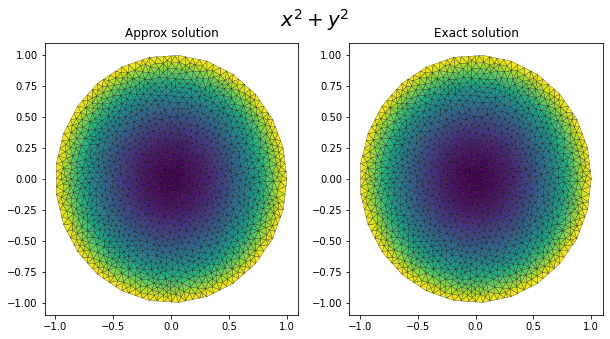

In [4]:
plotter.create_plot(mesh, u, h, '$x^{2}+y^{2}$', (10, 5))

In [5]:
plt.savefig('1.png')

<Figure size 432x288 with 0 Axes>

In [6]:
h_func = 'pow(x[0], 2) + sin(x[1])'
g_func = '2 * pow(x[0], 2)/R + cos(x[1])*x[1]/R'
f_func = '-(2 - sin(x[1]))  + alfa *(pow(x[0], 2) + sin(x[1]))'
mesh, u, h = boundary_solver.solve_problem(h_func, g_func, f_func)

L2-error =  0.009380815455277774
C-error =  0.0109175140031183


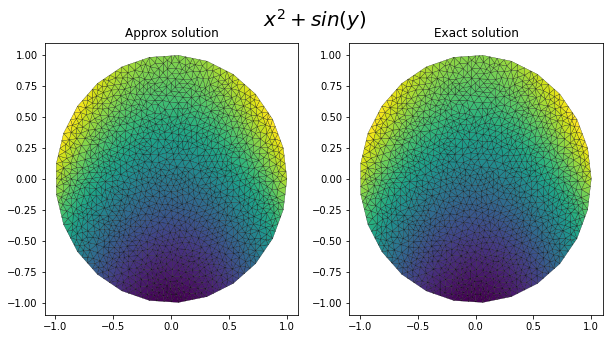

In [7]:
plotter.create_plot(mesh, u, h, '$x^{2}+sin(y)$', (10, 5))
plt.savefig('2.png')

In [8]:
h_func = 'exp(pow(x[0], 2) + pow(x[1], 2))'
g_func = 'exp(pow(x[0], 2) + pow(x[1], 2))* 2 * pow(x[0], 2) / R + exp(pow(x[0], 2) + pow(x[1], 2)) * 2 * pow(x[1], 2) / R'
f_func = '-(4 * pow(x[0], 2) + 2) * exp(pow(x[0], 2) + pow(x[1], 2)) -  (4 * pow(x[1], 2) + 2) * exp(pow(x[0], 2) + pow(x[1], 2)) + alfa * exp(pow(x[0], 2) + pow(x[1], 2))'
mesh, u, h = boundary_solver.solve_problem(h_func, g_func, f_func)

L2-error =  0.04909821111440111
C-error =  0.03762236430693955


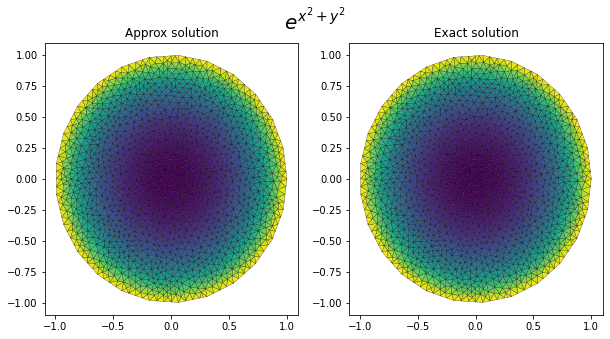

In [9]:
plotter.create_plot(mesh, u, h, '$e^{x^2 + y^2}$', (10, 5))
plt.savefig('3.png')

Heat conduction problem
========

In [31]:
error_L2, error_C, zfaces_u, zfaces_u_D, mesh = heat_solver.solve_problem(h_func='(pow(x[0], 2) + pow(x[1], 2)) * pow(t, 2)', 
                                                                          g_func='(2.0*pow(x[0], 2)/R + 2.0*pow(x[1], 2)/R) * pow(t, 2)', \
                                                                          f_func='2.0*(pow(x[0], 2) + pow(x[1], 2))*t - 4.0*alfa*pow(t, 2)')

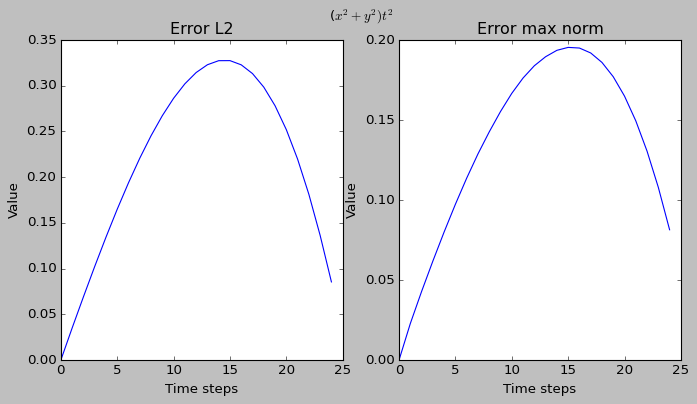

In [32]:
plotter.plot_error(error_L2, error_C,  '($x^{2}+y^{2})t^2$', figsize = (10, 5))

In [ ]:
anim = plotter.create_gif(zfaces_u[1:], zfaces_u_D[1:], mesh,  '($x^{2}+y^{2})t^2$')
anim.save('1.gif', writer='imagemagick')
HTML(anim.to_jshtml())


In [23]:
error_L2, error_C, zfaces_u, zfaces_u_D, mesh = heat_solver.solve_problem(h_func='(pow(x[0], 2) + sin(x[1]))* pow(t, 2)', 
                                                                          g_func='(2 * pow(x[0], 2)/R + cos(x[1])*x[1]/R) * pow(t, 2)', \
                                                                          f_func='2.0*(pow(x[0], 2) + sin(x[1]))*t - alfa*(2 - sin(x[1]))*pow(t, 2)')

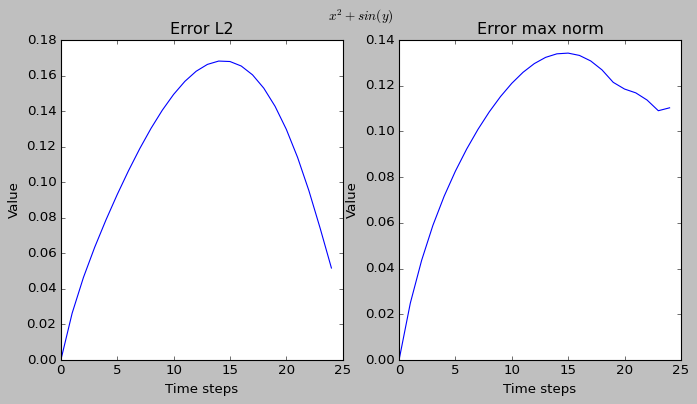

In [24]:
plotter.plot_error(error_L2, error_C,  '$x^{2}+sin(y)$', figsize = (10, 5))

In [ ]:
anim = plotter.create_gif(zfaces_u[1:], zfaces_u_D[1:], mesh,  '$x^{2}+sin(y)$')
anim.save('2.gif', writer='imagemagick')
HTML(anim.to_jshtml())

In [27]:
error_L2, error_C, zfaces_u, zfaces_u_D, mesh = heat_solver.solve_problem(h_func='(exp(pow(x[0], 2) + pow(x[1], 2)))* pow(t, 2)', 
                                g_func='(exp(pow(x[0], 2) + pow(x[1], 2))* 2 * pow(x[0], 2) / R + exp(pow(x[0], 2) + pow(x[1], 2)) * 2 * pow(x[1], 2) / R) * pow(t, 2)',                                    f_func='2.0*(exp(pow(x[0], 2) + pow(x[1], 2)))*t - alfa*((4 * pow(x[0], 2) + 2) * exp(pow(x[0], 2) + pow(x[1], 2)) +  (4 * pow(x[1], 2) + 2) * exp(pow(x[0], 2) + pow(x[1], 2)))*pow(t, 2)')

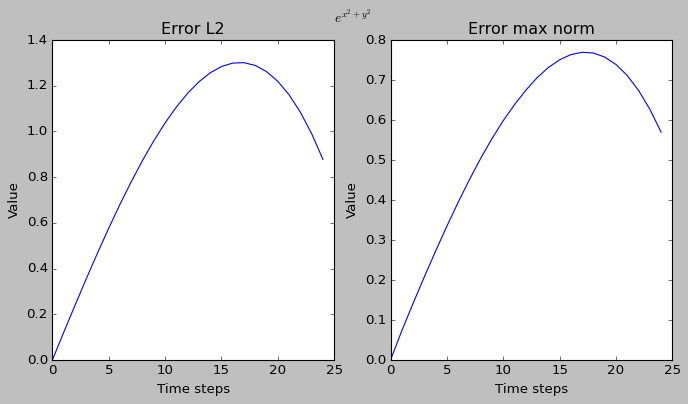

In [28]:
plotter.plot_error(error_L2, error_C, '$e^{x^2 + y^2}$', figsize = (10, 5))

In [ ]:
anim = plotter.create_gif(zfaces_u[1:], zfaces_u_D[1:], mesh,  '$e^{x^2 + y^2}$')
anim.save('3.gif', writer='imagemagick')
HTML(anim.to_jshtml())